In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
beddf = pd.read_csv('/kaggle/input/hospitals-and-beds-in-india/Hospitals_and_Beds_statewise.csv')

In [4]:
beddf.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Total,Unnamed: 6
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [5]:
beddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  37 non-null     object
 1   PHC         37 non-null     object
 2   CHC         37 non-null     object
 3   SDH         30 non-null     object
 4   DH          37 non-null     object
 5   Total       37 non-null     object
 6   Unnamed: 6  37 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [6]:
beddf['State'] = beddf['Unnamed: 0']
beddf = beddf.drop('Unnamed: 0',axis=1)
beddf = beddf.drop('Unnamed: 6',axis=1)

beddf = beddf.drop(int(beddf[beddf['State']=='All India'].index[0]),axis=0)

In [7]:
for column in beddf.columns:
    if column != 'State':
        beddf[column] = beddf[column].fillna(0).astype(int)


In [8]:
beddf

,PHC,CHC,SDH,DH,Total,State
0,27,4,0,3,34,Andaman & Nicobar Islands
1,1417,198,31,20,1666,Andhra Pradesh
2,122,62,0,15,199,Arunachal Pradesh
3,1007,166,14,33,1220,Assam
4,2007,63,33,43,2146,Bihar
5,40,2,1,4,47,Chandigarh
6,813,166,12,32,1023,Chhattisgarh
7,9,2,1,1,13,Dadra & Nagar Haveli
8,4,2,0,2,8,Daman & Diu
9,534,25,9,47,615,Delhi


In [9]:
beddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PHC     36 non-null     int64 
 1   CHC     36 non-null     int64 
 2   SDH     36 non-null     int64 
 3   DH      36 non-null     int64 
 4   Total   36 non-null     int64 
 5   State   36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


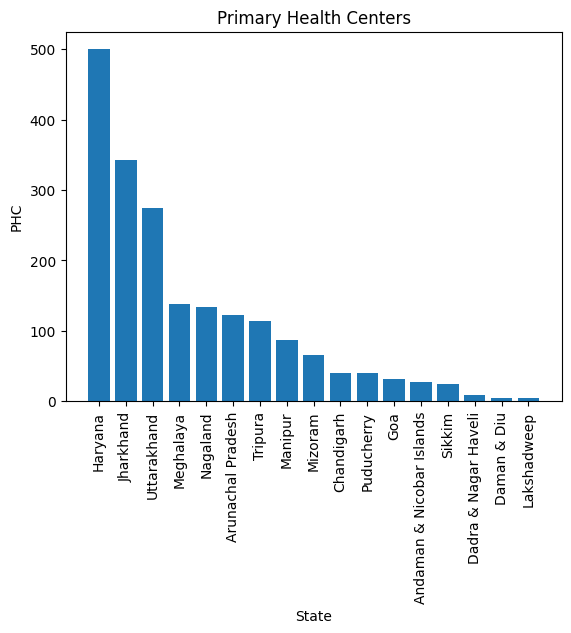

In [10]:
var = 'PHC' #Primary Health Centers
sorted_df = beddf.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=500]
plt.bar(sorted_df['State'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel(var)
plt.title('Primary Health Centers')
plt.show()

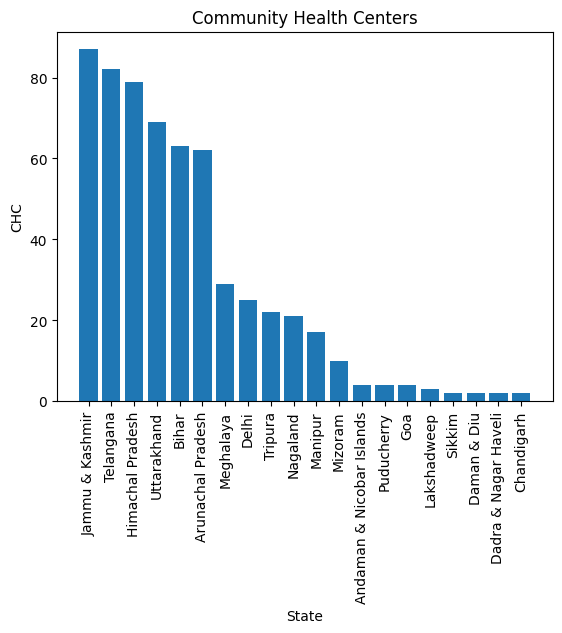

In [11]:
var = 'CHC' #Community Health Centers
sorted_df = beddf.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=100]
plt.bar(sorted_df['State'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel(var)
plt.title('Community Health Centers')
plt.show()

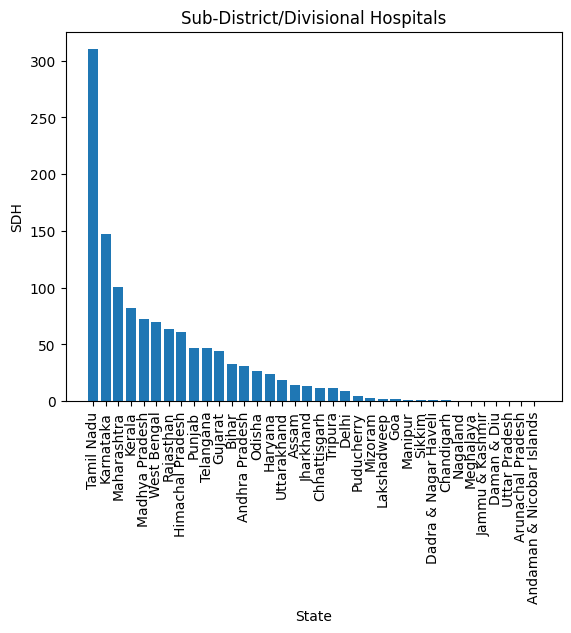

In [12]:
var = 'SDH' #Community Health Centers
sorted_df = beddf.sort_values(var, ascending=False)
# sorted_df = sorted_df[sorted_df[var]<=100]
plt.bar(sorted_df['State'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel(var)
plt.title('Sub-District/Divisional Hospitals')
plt.show()

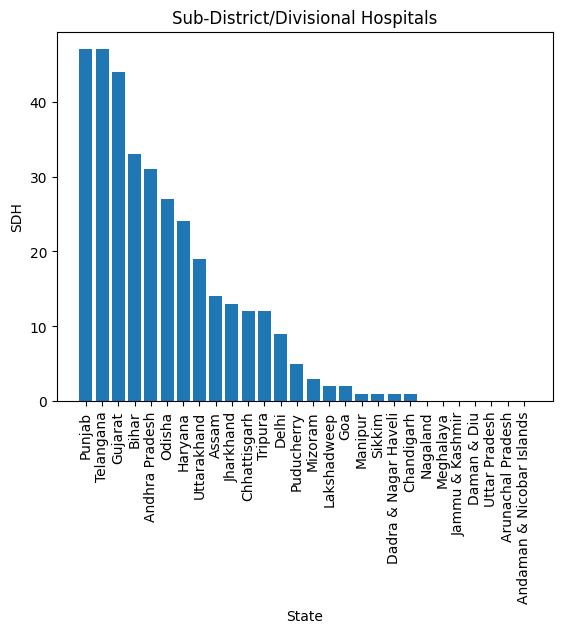

In [13]:
var = 'SDH' #Sub-District/Divisional Hospitals
sorted_df = beddf.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=50]
plt.bar(sorted_df['State'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel(var)
plt.title('Sub-District/Divisional Hospitals')
plt.show()

In [14]:
df = pd.read_csv('/kaggle/input/hospitals-and-beds-in-india/Number of Government Hospitals and Beds in Rural and Urban Areas .csv')

In [15]:
df

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017


In [16]:
df['Rural_beds'] = df['Unnamed: 2']
df['Urban_beds'] = df['Unnamed: 4']

In [17]:
df.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on,Rural_beds,Urban_beds
0,NaN,No.,Beds,No.,Beds,NaN,Beds,Beds
1,Andhra Pradesh,193,6480,65,16658,01.01.2017,6480,16658
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017,2136,268
3,Assam,1176,10944,50,6198,31.12.2017,10944,6198
4,Bihar,930,6083,103,5936,31.12.2016,6083,5936


In [18]:
df = df.drop(['Unnamed: 2','Unnamed: 4','As on'],axis=1)

In [19]:
df = df.drop(0,axis=0)

In [20]:
df.head()

,States/UTs,Rural hospitals,Urban hospitals,Rural_beds,Urban_beds
1,Andhra Pradesh,193,65,6480,16658
2,Arunachal Pradesh*,208,10,2136,268
3,Assam,1176,50,10944,6198
4,Bihar,930,103,6083,5936
5,Chhattisgarh,169,45,5070,4342


In [21]:
df_noin = df.drop(37,axis=0)

In [22]:
df_noin

,States/UTs,Rural hospitals,Urban hospitals,Rural_beds,Urban_beds
1,Andhra Pradesh,193,65,6480,16658
2,Arunachal Pradesh*,208,10,2136,268
3,Assam,1176,50,10944,6198
4,Bihar,930,103,6083,5936
5,Chhattisgarh,169,45,5070,4342
6,Goa*,17,25,1405,1608
7,Gujarat,364,122,11715,20565
8,Haryana*,609,59,6690,4550
9,Himachal Pradesh*,705,96,5665,6734
10,Jammu & Kashmir,56,76,7234,4417


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   States/UTs       37 non-null     object
 1   Rural hospitals  37 non-null     object
 2   Urban hospitals  37 non-null     object
 3   Rural_beds       37 non-null     object
 4   Urban_beds       37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [24]:
df.isnull().sum()

States/UTs         0
Rural hospitals    0
Urban hospitals    0
Rural_beds         0
Urban_beds         0
dtype: int64

In [25]:
for column in df_noin.columns:
    if column != 'States/UTs':
        df_noin[column] = df_noin[column].astype(int)

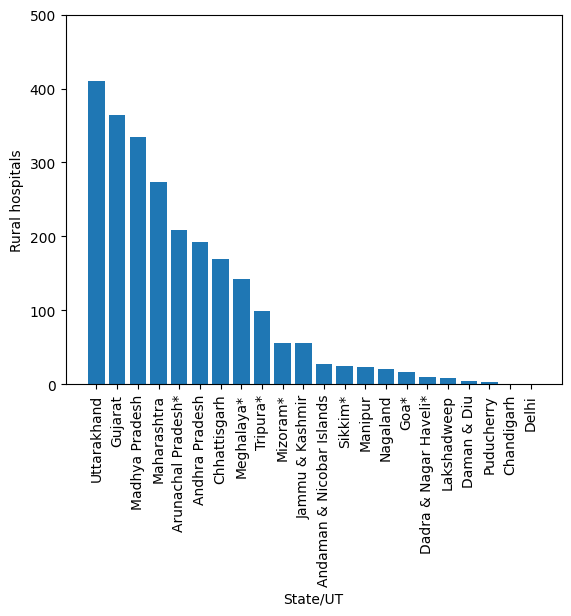

In [26]:
var = 'Rural hospitals'
sorted_df = df_noin.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=500]
plt.bar(sorted_df['States/UTs'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel(f'{var}')
plt.ylim(0,500)
plt.show()

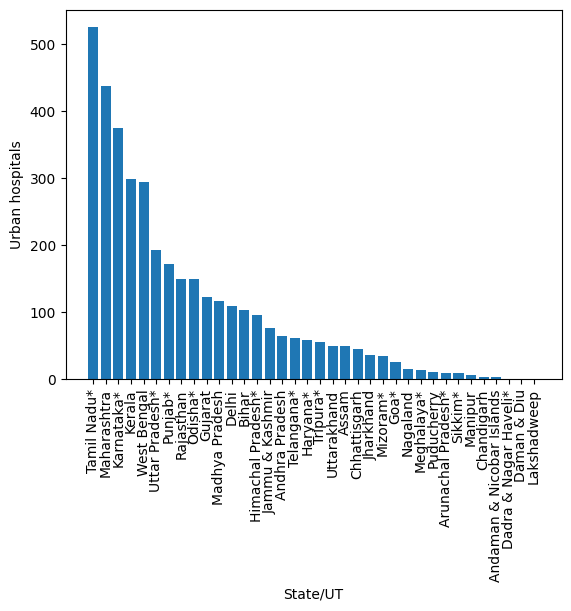

In [27]:
var = 'Urban hospitals'
sorted_df = df_noin.sort_values(var, ascending=False)
# sorted_df = sorted_df[sorted_df[var]<=500]
plt.bar(sorted_df['States/UTs'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel(f'{var}')
# plt.ylim(0,500)
plt.show()

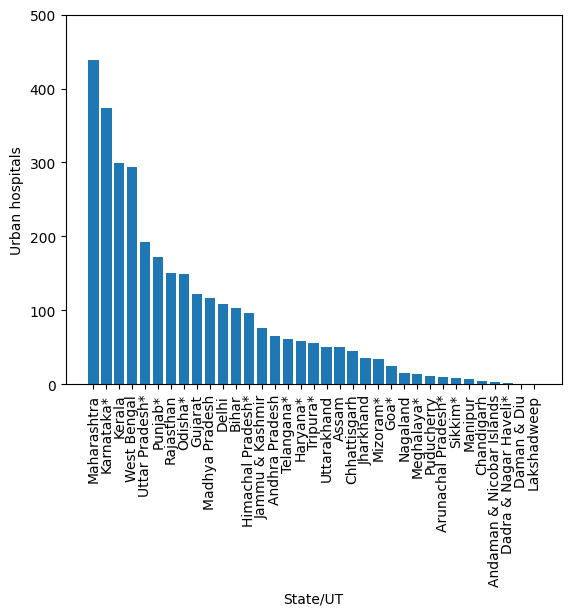

In [28]:
var = 'Urban hospitals'
sorted_df = df_noin.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=500]
plt.bar(sorted_df['States/UTs'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel(f'{var}')
plt.ylim(0,500)
plt.show()

In [29]:
df_noin['Hospitals'] = df_noin['Urban hospitals'] + df_noin['Rural hospitals']

In [30]:
df_noin['beds'] = df_noin['Urban_beds'] + df_noin['Rural_beds']

In [31]:
df_noin.head()

,States/UTs,Rural hospitals,Urban hospitals,Rural_beds,Urban_beds,Hospitals,beds
1,Andhra Pradesh,193,65,6480,16658,258,23138
2,Arunachal Pradesh*,208,10,2136,268,218,2404
3,Assam,1176,50,10944,6198,1226,17142
4,Bihar,930,103,6083,5936,1033,12019
5,Chhattisgarh,169,45,5070,4342,214,9412


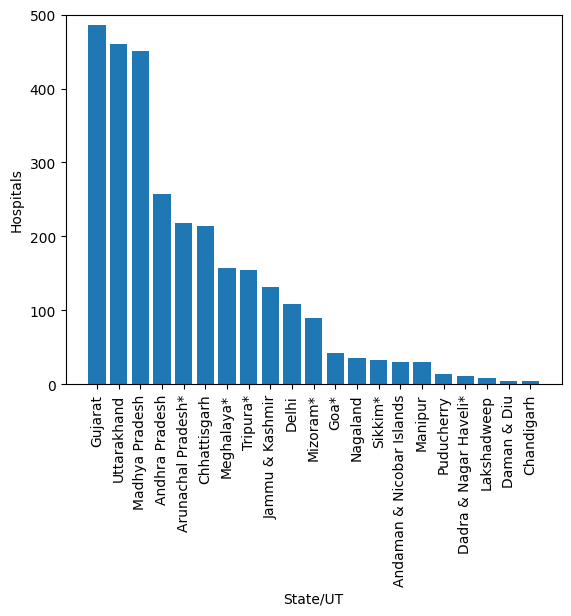

In [32]:
var = 'Hospitals'
sorted_df = df_noin.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=500]
plt.bar(sorted_df['States/UTs'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel(f'{var}')
plt.ylim(0,500)
plt.show()

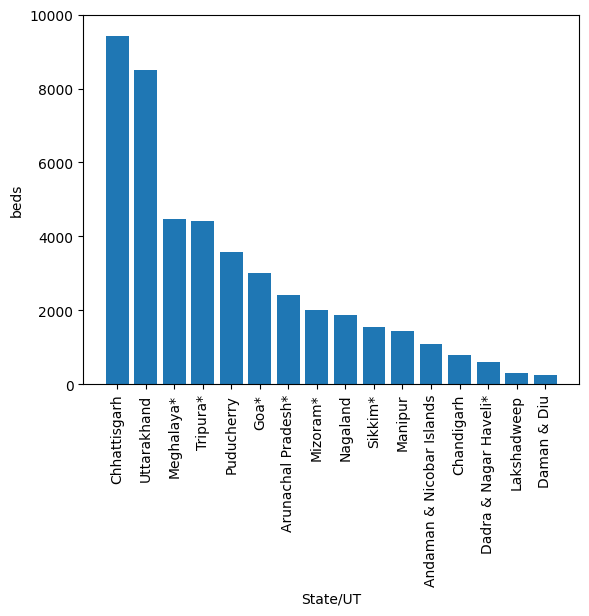

In [33]:
var = 'beds'
sorted_df = df_noin.sort_values(var, ascending=False)
sorted_df = sorted_df[sorted_df[var]<=10000]
plt.bar(sorted_df['States/UTs'], sorted_df[var])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel(f'{var}')
plt.ylim(0,10000)
plt.show()